In [1]:
import tensorflow as tf
import matplotlib as mpl
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (30,15)
mpl.rcParams['axes.grid'] = False

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df['Date'] = df['Date'].astype('datetime64[ns]')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# train_dates = pd.to_datetime(df['Date'])
df.head()

,Date,ghi,dni,dhi,temp_air,wind_speed,avg_rel_humidity,avg_station_pressure,avg_zenith_angle,avg_azimuth_angle,power
0,2013-07-01 01:00:00,0.0000,0.0000,0.0000,17.2105,2.3024,60.7118,825.9115,116.7567,33.2509,0.0
1,2013-07-01 02:00:00,0.0000,0.0000,0.0000,16.7352,2.1885,58.8865,826.0768,113.9583,21.4810,15.0
2,2013-07-01 03:00:00,0.0000,0.0000,0.0000,16.2042,2.0444,57.1323,825.7110,108.4950,35.0668,10.0
3,2013-07-01 04:00:00,0.0000,0.0000,0.0000,15.4403,2.6978,58.1780,826.2980,100.9300,47.0003,0.0
4,2013-07-01 05:00:00,3.0417,0.3379,3.0232,14.7358,2.7243,61.8460,826.7022,91.6717,57.4398,0.0


In [4]:
df.set_index(['Date'])

,ghi,dni,dhi,temp_air,wind_speed,avg_rel_humidity,avg_station_pressure,avg_zenith_angle,avg_azimuth_angle,power
Date,,,,,,,,,,
2013-07-01 01:00:00,0.0000,0.0000,0.0000,17.2105,2.3024,60.7118,825.9115,116.7567,33.2509,0.0
2013-07-01 02:00:00,0.0000,0.0000,0.0000,16.7352,2.1885,58.8865,826.0768,113.9583,21.4810,15.0
2013-07-01 03:00:00,0.0000,0.0000,0.0000,16.2042,2.0444,57.1323,825.7110,108.4950,35.0668,10.0
2013-07-01 04:00:00,0.0000,0.0000,0.0000,15.4403,2.6978,58.1780,826.2980,100.9300,47.0003,0.0
2013-07-01 05:00:00,3.0417,0.3379,3.0232,14.7358,2.7243,61.8460,826.7022,91.6717,57.4398,0.0
...,...,...,...,...,...,...,...,...,...,...
2014-12-28 19:00:00,0.0028,0.0000,0.0028,-11.5490,1.8013,51.1005,822.2577,109.3117,255.6400,5.0
2014-12-28 20:00:00,0.0043,0.0000,0.0043,-11.0330,1.9358,57.5958,822.4070,120.6483,264.3683,5.0
2014-12-28 21:00:00,0.0050,0.0000,0.0050,-10.8118,2.5911,57.8282,822.1638,132.1533,273.9050,5.0


In [5]:
df = df.drop(columns=["dni", "dhi", "avg_station_pressure","avg_zenith_angle","avg_azimuth_angle","avg_rel_humidity"])

In [6]:
df.head()
df.dtypes

Date          datetime64[ns]
ghi                  float64
temp_air             float64
wind_speed           float64
power                float64
dtype: object

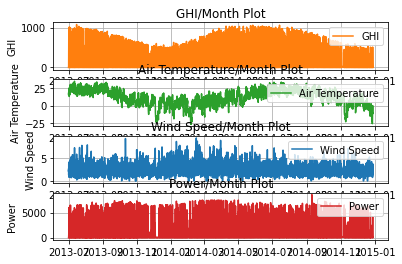

In [7]:
fig, axs = plt.subplots(4, 1)

axs[0].plot(df.Date, df.ghi, color='tab:orange', label='GHI')

axs[0].set_ylabel('GHI')
axs[0].set_title('GHI/Month Plot')
axs[0].grid(True)
axs[0].legend(loc='upper right');

axs[3].plot(df.Date, df.power, color='tab:red', label='Power')

axs[3].set_ylabel('Power')
axs[3].set_title('Power/Month Plot')
axs[3].grid(True)
axs[3].legend(loc='upper right');

axs[2].plot(df.Date, df.wind_speed, color='tab:blue', label='Wind Speed')

axs[2].set_ylabel('Wind Speed')
axs[2].set_title('Wind Speed/Month Plot')
axs[2].grid(True)
axs[2].legend(loc='upper right');

axs[1].plot(df.Date , df.temp_air, color='tab:green', label='Air Temperature')

axs[1].set_ylabel('Air Temperature')
axs[1].set_title('Air Temperature/Month Plot')
axs[1].grid(True)
axs[1].legend(loc='upper right');

fig.savefig('FullPlot.jpg')

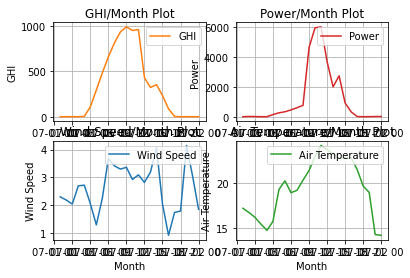

In [8]:
fig, axs = plt.subplots(2, 2)

axs[0,0].plot(df.Date[:24], df.ghi[:24], color='tab:orange', label='GHI')
axs[0,0].set_xlabel('Month')
axs[0,0].set_ylabel('GHI')
axs[0,0].set_title('GHI/Month Plot')
axs[0,0].grid(True)
axs[0,0].legend(loc='upper right');

axs[0,1].plot(df.Date[:24], df.power[:24], color='tab:red', label='Power')
axs[0,1].set_xlabel('Month')
axs[0,1].set_ylabel('Power')
axs[0,1].set_title('Power/Month Plot')
axs[0,1].grid(True)
axs[0,1].legend(loc='upper right');

axs[1,0].plot(df.Date[:24], df.wind_speed[:24], color='tab:blue', label='Wind Speed')
axs[1,0].set_xlabel('Month')
axs[1,0].set_ylabel('Wind Speed')
axs[1,0].set_title('Wind Speed/Month Plot')
axs[1,0].grid(True)
axs[1,0].legend(loc='upper right');

axs[1,1].plot(df.Date[:24], df.temp_air[:24], color='tab:green', label='Air Temperature')
axs[1,1].set_xlabel('Month')
axs[1,1].set_ylabel('Air Temperature')
axs[1,1].set_title('Air Temperature/Month Plot')
axs[1,1].grid(True)
axs[1,1].legend(loc='upper right');

fig.savefig('24hPlot.jpg')

In [9]:
hours = df.Date.dt.hour
month = df.Date.dt.month
year = df.Date.dt.year
df = df.drop(columns=["Date"])
df.head()

,ghi,temp_air,wind_speed,power
0,0.0000,17.2105,2.3024,0.0
1,0.0000,16.7352,2.1885,15.0
2,0.0000,16.2042,2.0444,10.0
3,0.0000,15.4403,2.6978,0.0
4,3.0417,14.7358,2.7243,0.0


In [10]:
df = pd.concat([df, hours], axis=1)
df.rename(columns={'Date':'hour'}, inplace=True)
df = pd.concat([df, month], axis=1)
df.rename(columns={'Date':'month'}, inplace=True)
df = pd.concat([df, year], axis=1)
df.rename(columns={'Date':'year'}, inplace=True)

In [11]:
# column_names = ["year","month","hour", "ghi","dni","dhi", "temp_air","wind_speed","avg_rel_humidity","avg_station_pressure",
#                 "avg_zenith_angle","avg_azimuth_angle","power"]
column_names = ["year","month","hour", "ghi","temp_air","wind_speed","power"]


df = df.reindex(columns=column_names)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12744 entries, 0 to 12743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        12744 non-null  int64  
 1   month       12744 non-null  int64  
 2   hour        12744 non-null  int64  
 3   ghi         12744 non-null  float64
 4   temp_air    12744 non-null  float64
 5   wind_speed  12744 non-null  float64
 6   power       12744 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 697.1 KB
None
               year         month  ...    wind_speed         power
count  12744.000000  12744.000000  ...  12744.000000  12744.000000
mean    2013.657407      7.463826  ...      2.494810   1020.503195
std        0.474595      3.292144  ...      1.159943   1812.087200
min     2013.000000      1.000000  ...      0.000000      0.000000
25%     2013.000000      5.000000  ...      1.746500      5.000000
50%     2014.000000      8.000000  ...      2.339400     15.0000

In [12]:
df.sample(5)

,year,month,hour,ghi,temp_air,wind_speed,power
10667,2014,9,17,15.5889,10.7742,1.6778,1493.666667
5392,2014,2,9,274.5211,10.1085,2.8519,2848.333333
2908,2013,10,19,0.0142,5.9821,5.8483,0.000000
10935,2014,10,1,0.0149,6.7869,1.9903,5.000000
2693,2013,10,20,0.0121,9.7937,2.6063,15.000000


In [13]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]

print(X)

       month  hour     ghi  temp_air  wind_speed
0          7     1  0.0000   17.2105      2.3024
1          7     2  0.0000   16.7352      2.1885
2          7     3  0.0000   16.2042      2.0444
3          7     4  0.0000   15.4403      2.6978
4          7     5  3.0417   14.7358      2.7243
...      ...   ...     ...       ...         ...
12739     12    19  0.0028  -11.5490      1.8013
12740     12    20  0.0043  -11.0330      1.9358
12741     12    21  0.0050  -10.8118      2.5911
12742     12    22  0.0050  -10.9942      2.4815
12743     12    23  0.0085  -10.7258      2.9345

[12744 rows x 5 columns]


In [14]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle = True)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [17]:
xgr=XGBRegressor()
rf=RandomForestRegressor()
lr=LinearRegression()
dt=DecisionTreeRegressor()
sm=SVR()

In [18]:
model_xg  = xgr.fit(X_train,y_train)
y_xg  = model_xg.predict(X_test)

model_rf  = rf.fit(X_train,y_train)
y_rf  = model_rf.predict(X_test)

model_lr  = lr.fit(X_train,y_train)
y_lr  = model_lr.predict(X_test)

model_dt  = dt.fit(X_train,y_train)
y_dt  = model_dt.predict(X_test)

model_sm  = sm.fit(X_train,y_train)
y_sm  = model_sm.predict(X_test)

[14:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print('R2-xgb',r2_score(y_test,y_xg))
print('RMSE-xgb',np.sqrt(mean_squared_error(y_test,y_xg)))

print('R2-rf',r2_score(y_test,y_rf))
print('RMSE-rf',np.sqrt(mean_squared_error(y_test,y_rf)))

print('R2-lr',r2_score(y_test,y_lr))
print('RMSE-lr',np.sqrt(mean_squared_error(y_test,y_lr)))

print('R2-dt',r2_score(y_test,y_dt))
print('RMSE-dt',np.sqrt(mean_squared_error(y_test,y_dt)))

print('R2-svm',r2_score(y_test,y_sm))
print('RMSE-svm',np.sqrt(mean_squared_error(y_test,y_sm)))

R2-xgb 0.78665957314014
RMSE-xgb 0.4793643820711771
R2-rf 0.7965296503889138
RMSE-rf 0.4681443082676766
R2-lr 0.5412732648757254
RMSE-lr 0.702920497831608
R2-dt 0.6433676650522647
RMSE-dt 0.6197828295944489
R2-svm 0.7593391228080667
RMSE-svm 0.5091337999635899


In [20]:
y_test = scaler_y.inverse_transform(y_test)
y_rf = scaler_y.inverse_transform(y_rf)

In [21]:
y_test = pd.DataFrame(y_test,columns =["power"])
y_rf = pd.DataFrame(y_rf,columns =["power"])

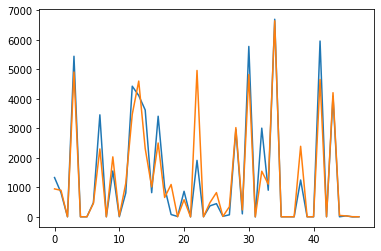

In [22]:
plt.plot(y_test[:48])
plt.plot(y_rf[:48])


plt.savefig('prediction.jpg')

In [23]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params_rf={
"n_estimators"     : [50, 100, 150, 200, 500, 800,1000,1500] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15,20,25]}

In [24]:
random_search=RandomizedSearchCV(rf,param_distributions=params_rf,n_iter=10,n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.0min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [25]:
random_search.best_estimator_ 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [26]:
tuned_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
tune_model_rf  = tuned_rf.fit(X_train,y_train)
y_rf  = tune_model_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [28]:

y_rf = scaler_y.inverse_transform(y_rf)
print('R2-rf',r2_score(y_test,y_rf))
print('RMSE-rf',np.sqrt(mean_squared_error(y_test,y_rf)))

R2-rf 0.8056651999896656
RMSE-rf 829.0228930246632
